# Subsequence strings

Given two strings `a` and `b`, is `a` a subsequence of `b`?

For example,
Given:
a = "aabcc",
b = "dabaabcacb",

return True : dAbAaBCaCb



In [1]:
import random

In [55]:
s1 = "aabcc"
s2t = "dabaabcacb"
s2f = "dabacc"

s2 = s2t

`dp_table[i, j]` is True if first `i` characters of `s1` can be found in first `j` characters of `s2`.

In [3]:
dp_table = {(i, j): False
           for i in range(len(s1)+1)
           for j in range(len(s2)+1)}
dp_table

{(0, 0): False,
 (0, 1): False,
 (0, 2): False,
 (0, 3): False,
 (0, 4): False,
 (0, 5): False,
 (0, 6): False,
 (0, 7): False,
 (0, 8): False,
 (0, 9): False,
 (0, 10): False,
 (1, 0): False,
 (1, 1): False,
 (1, 2): False,
 (1, 3): False,
 (1, 4): False,
 (1, 5): False,
 (1, 6): False,
 (1, 7): False,
 (1, 8): False,
 (1, 9): False,
 (1, 10): False,
 (2, 0): False,
 (2, 1): False,
 (2, 2): False,
 (2, 3): False,
 (2, 4): False,
 (2, 5): False,
 (2, 6): False,
 (2, 7): False,
 (2, 8): False,
 (2, 9): False,
 (2, 10): False,
 (3, 0): False,
 (3, 1): False,
 (3, 2): False,
 (3, 3): False,
 (3, 4): False,
 (3, 5): False,
 (3, 6): False,
 (3, 7): False,
 (3, 8): False,
 (3, 9): False,
 (3, 10): False,
 (4, 0): False,
 (4, 1): False,
 (4, 2): False,
 (4, 3): False,
 (4, 4): False,
 (4, 5): False,
 (4, 6): False,
 (4, 7): False,
 (4, 8): False,
 (4, 9): False,
 (4, 10): False,
 (5, 0): False,
 (5, 1): False,
 (5, 2): False,
 (5, 3): False,
 (5, 4): False,
 (5, 5): False,
 (5, 6): False,
 (5

In [4]:
def show_table(table):
    return '\n'.join(
        ' '.join(str(table[i, j])[0] for j in sorted(set([k[1] for k in table])))
        for i in sorted(set([k[0] for k in table])))        

In [5]:
print(show_table(dp_table))

F F F F F F F F F F F
F F F F F F F F F F F
F F F F F F F F F F F
F F F F F F F F F F F
F F F F F F F F F F F
F F F F F F F F F F F


In [6]:
s2 = s2f

s1 = 'aaaa'
s2 = 'aaababb'

print(s1, s2)

dp_table = {(i, j): False
           for i in range(len(s1)+1)
           for j in range(len(s2)+1)}

backpointers = {}

for i in range(len(s1)+1):
    for j in range(i, len(s2)+1):
        if i == 0 or j == 0:
            dp_table[i, j] = True
            print('aa', i, j, '!', '!', dp_table[i, j])
        else:
            # extend by character from s2
            if dp_table[i, j-1]:
                dp_table[i, j] = True
                backpointers[i, j] = (i, j-1, s2[j-1], 's2')
                print('s2', i, j, s1[i-1], s2[j-1], dp_table[i, j])                
            # extend by character from s1
            if dp_table[i-1, j-1] and s1[i-1] == s2[j-1]:
                dp_table[i, j] = True
                backpointers[i, j] = (i-1, j-1, s1[i-1], 's1')                
                print('s1', i, j, s1[i-1], s2[j-1], dp_table[i, j])
            if not dp_table[i, j]:
                print('xx', i, j, s1[i-1], s2[j-1], dp_table[i, j])

print(show_table(dp_table))
backpointers

aaaa aaababb
aa 0 0 ! ! True
aa 0 1 ! ! True
aa 0 2 ! ! True
aa 0 3 ! ! True
aa 0 4 ! ! True
aa 0 5 ! ! True
aa 0 6 ! ! True
aa 0 7 ! ! True
s1 1 1 a a True
s2 1 2 a a True
s1 1 2 a a True
s2 1 3 a a True
s1 1 3 a a True
s2 1 4 a b True
s2 1 5 a a True
s1 1 5 a a True
s2 1 6 a b True
s2 1 7 a b True
s1 2 2 a a True
s2 2 3 a a True
s1 2 3 a a True
s2 2 4 a b True
s2 2 5 a a True
s1 2 5 a a True
s2 2 6 a b True
s2 2 7 a b True
s1 3 3 a a True
s2 3 4 a b True
s2 3 5 a a True
s1 3 5 a a True
s2 3 6 a b True
s2 3 7 a b True
xx 4 4 a b False
s1 4 5 a a True
s2 4 6 a b True
s2 4 7 a b True
T T T T T T T T
F T T T T T T T
F F T T T T T T
F F F T T T T T
F F F F F T T T


{(1, 1): (0, 0, 'a', 's1'),
 (1, 2): (0, 1, 'a', 's1'),
 (1, 3): (0, 2, 'a', 's1'),
 (1, 4): (1, 3, 'b', 's2'),
 (1, 5): (0, 4, 'a', 's1'),
 (1, 6): (1, 5, 'b', 's2'),
 (1, 7): (1, 6, 'b', 's2'),
 (2, 2): (1, 1, 'a', 's1'),
 (2, 3): (1, 2, 'a', 's1'),
 (2, 4): (2, 3, 'b', 's2'),
 (2, 5): (1, 4, 'a', 's1'),
 (2, 6): (2, 5, 'b', 's2'),
 (2, 7): (2, 6, 'b', 's2'),
 (3, 3): (2, 2, 'a', 's1'),
 (3, 4): (3, 3, 'b', 's2'),
 (3, 5): (2, 4, 'a', 's1'),
 (3, 6): (3, 5, 'b', 's2'),
 (3, 7): (3, 6, 'b', 's2'),
 (4, 5): (3, 4, 'a', 's1'),
 (4, 6): (4, 5, 'b', 's2'),
 (4, 7): (4, 6, 'b', 's2')}

In [7]:
def show_backtrace(bps):
    i = max([0] + [k[0] for k in bps])
    j = max([0] + [k[1] for k in bps])
    chars = ''
    if (i, j) in bps:
        while i != 0 and j != 0:
            if bps[i, j][3] == 's1':
                chars += bps[i, j][2].upper()
            else:
                chars += bps[i, j][2]
            i, j = bps[i, j][0], bps[i, j][1] 
        return ''.join(list(reversed(chars)))
    else:
        return ''

In [8]:
show_backtrace(backpointers)

'AAAbAbb'

In [9]:
def is_subseq(seq1, seq2, return_backpointers=False, return_table=False, debug=False):
    """Return true if seq1 is a subsequence of seq2.
    If return_backpointers, also return the set of backpointers to
    reconstruct the subsequence"""
    
    # dp_table[i, j] is True if first i characters of seq1 can
    # be found in the first j characters of seq2
  
    dp_table = {(i, j): False
               for i in range(len(seq1)+1)
               for j in range(len(seq2)+1)}

    backpointers = {}
    
    for i in range(len(seq1)+1):
        for j in range(i, len(seq2)+1):
            if i == 0 or j == 0:
                dp_table[i, j] = True
                if debug: print('aa', i, j, '!', '!', dp_table[i, j])
            else:
                # extend by character from s2
                if dp_table[i, j-1]:
                    dp_table[i, j] = True
                    backpointers[i, j] = (i, j-1, seq2[j-1], 's2')
                    if debug: print('s2', i, j, seq1[i-1], seq2[j-1], dp_table[i, j])                
                # extend by character from s1
                if dp_table[i-1, j-1] and seq1[i-1] == seq2[j-1]:
                    dp_table[i, j] = True
                    backpointers[i, j] = (i-1, j-1, seq1[i-1], 's1')                
                    if debug: print('s1', i, j, seq1[i-1], seq2[j-1], dp_table[i, j])
                if not dp_table[i, j]:
                    if debug: print('xx', i, j, seq1[i-1], seq2[j-1], dp_table[i, j]) 
   
#     if return_backpointers:
#         return dp_table[len(seq1), len(seq2)], backpointers
#     else:
#         return dp_table[len(seq1), len(seq2)]
    
    if return_backpointers or return_table:
        retval = [dp_table[len(seq1), len(seq2)]]
        if return_backpointers:
            retval += [backpointers]
        if return_table:
            retval += [dp_table]
        return tuple(retval)
    else:
        return dp_table[len(seq1), len(seq2)]

In [10]:
is_subseq(s1, s2t, debug=True)

aa 0 0 ! ! True
aa 0 1 ! ! True
aa 0 2 ! ! True
aa 0 3 ! ! True
aa 0 4 ! ! True
aa 0 5 ! ! True
aa 0 6 ! ! True
aa 0 7 ! ! True
aa 0 8 ! ! True
aa 0 9 ! ! True
aa 0 10 ! ! True
xx 1 1 a d False
s1 1 2 a a True
s2 1 3 a b True
s2 1 4 a a True
s1 1 4 a a True
s2 1 5 a a True
s1 1 5 a a True
s2 1 6 a b True
s2 1 7 a c True
s2 1 8 a a True
s1 1 8 a a True
s2 1 9 a c True
s2 1 10 a b True
xx 2 2 a a False
xx 2 3 a b False
s1 2 4 a a True
s2 2 5 a a True
s1 2 5 a a True
s2 2 6 a b True
s2 2 7 a c True
s2 2 8 a a True
s1 2 8 a a True
s2 2 9 a c True
s2 2 10 a b True
xx 3 3 a b False
xx 3 4 a a False
s1 3 5 a a True
s2 3 6 a b True
s2 3 7 a c True
s2 3 8 a a True
s1 3 8 a a True
s2 3 9 a c True
s2 3 10 a b True
xx 4 4 a a False
xx 4 5 a a False
xx 4 6 a b False
xx 4 7 a c False
s1 4 8 a a True
s2 4 9 a c True
s2 4 10 a b True


True

In [11]:
def show_annotated_table(table, bps):
    return '\n'.join(' '.join('.' if (i, j) not in bps else bps[i, j][2] if table[i, j] else '.' for j in sorted(set([k[1] for k in table])))
        for i in sorted(set([k[0] for k in table])))

In [12]:
tf, bps, tb = is_subseq(s1, s2t, return_backpointers=True, return_table=True)
tf

True

In [13]:
show_backtrace(bps)

'AbAAbcAcb'

In [14]:
print(show_table(tb))

T T T T T T T T T T T
F F T T T T T T T T T
F F F F T T T T T T T
F F F F F T T T T T T
F F F F F F F F T T T


In [15]:
print(show_annotated_table(tb, bps))

. . . . . . . . . . .
. . a b a a b c a c b
. . . . a a b c a c b
. . . . . a b c a c b
. . . . . . . . a c b


In [16]:
len(show_backtrace(bps)) == len(s2t)

False

In [17]:
s1, s2t

('aaaa', 'dabaabcacb')

In [18]:
bps

{(1, 2): (0, 1, 'a', 's1'),
 (1, 3): (1, 2, 'b', 's2'),
 (1, 4): (0, 3, 'a', 's1'),
 (1, 5): (0, 4, 'a', 's1'),
 (1, 6): (1, 5, 'b', 's2'),
 (1, 7): (1, 6, 'c', 's2'),
 (1, 8): (0, 7, 'a', 's1'),
 (1, 9): (1, 8, 'c', 's2'),
 (1, 10): (1, 9, 'b', 's2'),
 (2, 4): (1, 3, 'a', 's1'),
 (2, 5): (1, 4, 'a', 's1'),
 (2, 6): (2, 5, 'b', 's2'),
 (2, 7): (2, 6, 'c', 's2'),
 (2, 8): (1, 7, 'a', 's1'),
 (2, 9): (2, 8, 'c', 's2'),
 (2, 10): (2, 9, 'b', 's2'),
 (3, 5): (2, 4, 'a', 's1'),
 (3, 6): (3, 5, 'b', 's2'),
 (3, 7): (3, 6, 'c', 's2'),
 (3, 8): (2, 7, 'a', 's1'),
 (3, 9): (3, 8, 'c', 's2'),
 (3, 10): (3, 9, 'b', 's2'),
 (4, 8): (3, 7, 'a', 's1'),
 (4, 9): (4, 8, 'c', 's2'),
 (4, 10): (4, 9, 'b', 's2')}

In [19]:
is_subseq(s1, s2f)

False

In [20]:
is_subseq('aaaa', 'aaababb', return_backpointers=True, debug=True)

aa 0 0 ! ! True
aa 0 1 ! ! True
aa 0 2 ! ! True
aa 0 3 ! ! True
aa 0 4 ! ! True
aa 0 5 ! ! True
aa 0 6 ! ! True
aa 0 7 ! ! True
s1 1 1 a a True
s2 1 2 a a True
s1 1 2 a a True
s2 1 3 a a True
s1 1 3 a a True
s2 1 4 a b True
s2 1 5 a a True
s1 1 5 a a True
s2 1 6 a b True
s2 1 7 a b True
s1 2 2 a a True
s2 2 3 a a True
s1 2 3 a a True
s2 2 4 a b True
s2 2 5 a a True
s1 2 5 a a True
s2 2 6 a b True
s2 2 7 a b True
s1 3 3 a a True
s2 3 4 a b True
s2 3 5 a a True
s1 3 5 a a True
s2 3 6 a b True
s2 3 7 a b True
xx 4 4 a b False
s1 4 5 a a True
s2 4 6 a b True
s2 4 7 a b True


(True,
 {(1, 1): (0, 0, 'a', 's1'),
  (1, 2): (0, 1, 'a', 's1'),
  (1, 3): (0, 2, 'a', 's1'),
  (1, 4): (1, 3, 'b', 's2'),
  (1, 5): (0, 4, 'a', 's1'),
  (1, 6): (1, 5, 'b', 's2'),
  (1, 7): (1, 6, 'b', 's2'),
  (2, 2): (1, 1, 'a', 's1'),
  (2, 3): (1, 2, 'a', 's1'),
  (2, 4): (2, 3, 'b', 's2'),
  (2, 5): (1, 4, 'a', 's1'),
  (2, 6): (2, 5, 'b', 's2'),
  (2, 7): (2, 6, 'b', 's2'),
  (3, 3): (2, 2, 'a', 's1'),
  (3, 4): (3, 3, 'b', 's2'),
  (3, 5): (2, 4, 'a', 's1'),
  (3, 6): (3, 5, 'b', 's2'),
  (3, 7): (3, 6, 'b', 's2'),
  (4, 5): (3, 4, 'a', 's1'),
  (4, 6): (4, 5, 'b', 's2'),
  (4, 7): (4, 6, 'b', 's2')})

In [77]:
def is_subseq_recursive(s1, s2):
#     print(s1, s2)
    if not s1:
        return True
    elif len(s1) > len(s2):
        return False
    else:
        if s1[-1] == s2[-1]:
            return is_subseq_recursive(s1, s2[:-1]) or is_subseq_recursive(s1[:-1], s2[:-1])
        else:
            return is_subseq_recursive(s1, s2[:-1])

In [67]:
def is_subseq_recursive_2(s1, s2):
    if not s1:
        return True
    elif len(s1) > len(s2):
        return False
    else:
        if s1[-1] == s2[-1]:
            return is_subseq_recursive(s1[:-1], s2[:-1]) or is_subseq_recursive(s1, s2[:-1])
        else:
            return is_subseq_recursive(s1, s2[:-1])

In [28]:
import uuid

In [24]:
is_subseq_recursive(s1, s2t)

True

In [25]:
is_subseq_recursive(s1, s2f)

False

In [76]:
def is_subseq_recursive_dot(s1, s2):
    node_id = uuid.uuid4().hex
    node_string = 'n{} [label="{}\\n{}"];'.format(node_id, s1, s2)
#     print(s1, s2, node_string)
    if not s1:
        return node_id, ['n{} [label="-\\n{}\\nTrue"];'.format(node_id, s2)]
    elif len(s1) > len(s2):
        return node_id, ['n{} [label="{}\\n{}\\nFalse"];'.format(node_id, s1, s2)]
    else:
        if s1[-1] == s2[-1]:
            node1_id, node1_graph = is_subseq_recursive_dot(s1[:-1], s2[:-1])
            node2_id, node2_graph = is_subseq_recursive_dot(s1, s2[:-1])
            return node_id, ([node_string, 
                    'n{} -> n{};'.format(node_id, node1_id), 
                    'n{} -> n{};'.format(node_id, node2_id)] + 
                    node1_graph + node2_graph)
        else:
            node1_id, node1_graph = is_subseq_recursive_dot(s1, s2[:-1])
            return node_id, ([node_string, 
                    'n{} -> n{};'.format(node_id, node1_id)] + 
                    node1_graph)

In [51]:
uuid.uuid4().hex

'ae50b62c418f4ba8902bfa8bab4948e0'

In [78]:
root, graph = is_subseq_recursive_dot('daabcc', 'dabaabcacb')
print('\n'.join(graph))

nd5092f0e2ba047ba9b662e17a650791a [label="daabcc\ndabaabcacb"];
nd5092f0e2ba047ba9b662e17a650791a -> nc243f60568164ba495d5f89dc1075a85;
nc243f60568164ba495d5f89dc1075a85 [label="daabcc\ndabaabcac"];
nc243f60568164ba495d5f89dc1075a85 -> n933e3a2ebca34034866b98ab19ee3f90;
nc243f60568164ba495d5f89dc1075a85 -> n3c49af7ea69340f2a97827a0547f73db;
n933e3a2ebca34034866b98ab19ee3f90 [label="daabc\ndabaabca"];
n933e3a2ebca34034866b98ab19ee3f90 -> n8d50442e9d704d7a8e9f0ba2f38e73fc;
n8d50442e9d704d7a8e9f0ba2f38e73fc [label="daabc\ndabaabc"];
n8d50442e9d704d7a8e9f0ba2f38e73fc -> n942c205bd0994681bf159f01fc42d0f5;
n8d50442e9d704d7a8e9f0ba2f38e73fc -> n8aab1aa30e494cef8895ff177a1d0623;
n942c205bd0994681bf159f01fc42d0f5 [label="daab\ndabaab"];
n942c205bd0994681bf159f01fc42d0f5 -> na797ca966ed045d5a14888ef06ae64ba;
n942c205bd0994681bf159f01fc42d0f5 -> nd7ea02b3fb6348e49929c458903e1c66;
na797ca966ed045d5a14888ef06ae64ba [label="daa\ndabaa"];
na797ca966ed045d5a14888ef06ae64ba -> nfc8f27c7ea3b45f69d3e28ff

In [70]:
is_subseq_recursive('bdabcc', 'dabaabcacb')

bdabcc dabaabcacb
bdabcc dabaabcac
bdabcc dabaabca
bdabcc dabaabc
bdabcc dabaab
bdabcc dabaa
bdabc dabaab
bdabc dabaa
bdabc daba
bdabc dabaabca
bdabc dabaabc
bdabc dabaab
bdabc dabaa
bdabc daba
bdab dabaab
bdab dabaa
bdab daba
bdab dab
bda dabaa
bda daba
bda dab
bda da
bd dab
bd da
bd d
bd daba
bd dab
bd da
bd d


False

In [75]:
root, graph = is_subseq_recursive_dot('bdabcc', 'dabaabcacb')
print('\n'.join(graph))

bdabcc dabaabcacb nae20c69b2c4d4ea2a239af485ca10f16 [label="bdabcc\ndabaabcacb"];
bdabcc dabaabcac nac3868f0d46645ca8bf1b02110448236 [label="bdabcc\ndabaabcac"];
bdabc dabaabca nf5a124f6b457426eaa13f9d58a716fe1 [label="bdabc\ndabaabca"];
bdabc dabaabc nf82bf143985849a9a14d7272ab8be040 [label="bdabc\ndabaabc"];
bdab dabaab nf5694edb16d84740ad75d3c3a9dc33f4 [label="bdab\ndabaab"];
bda dabaa n7734cd7f92a34a3bbb223dac592bd496 [label="bda\ndabaa"];
bd daba nf51d59c7071c4725a4e961fd017fd0b6 [label="bd\ndaba"];
bd dab n48a2b0c66af943439d0c9767e9181c50 [label="bd\ndab"];
bd da nfee98ef394994c0b9664921c73ae7882 [label="bd\nda"];
bd d n077956a8b783437ba5a65c3fd3380e2f [label="bd\nd"];
bda daba nd7f11536d8df400d860ac372d1c3e9f8 [label="bda\ndaba"];
bd dab nb1bf7b9e21a64b30a7a536a9b8649e56 [label="bd\ndab"];
bd da nb0329d485ca14bfaa79caa33670a8699 [label="bd\nda"];
bd d ne91eaaeffb1443639b733682718f4092 [label="bd\nd"];
bda dab n115e972256cc4394a1eba134f114e4ab [label="bda\ndab"];
bda da na7811522

In [30]:
def make_string(length, alphabet=None):
    if not alphabet:
        alphabet = 'abcdefgh'
    return ''.join(random.choice(alphabet) for _ in range(length)) 

In [31]:
def interleave(s1, s2, wander_limit=10, debug=False):
    i1 = i2 = wander = 0
    interleaved = []
    while i1 <= len(s1) and i2 <= len(s2):
        if i1 == len(s1):
            if debug: print(i1, i2, wander, 'remaining s2', s2[i2:])
            interleaved += s2[i2:]
            i2 = len(s2) + 1
        elif i2 == len(s2):
            if debug: print(i1, i2, wander, 'remaining s1', s1[i1:])
            interleaved += s1[i1:]
            i1 = len(s1) + 1
        else:
            if wander == wander_limit:
                step = -1
            elif wander == -wander_limit:
                step = +1
            else:
                step = random.choice([+1, -1])
            if step == +1:
                if debug: print(i1, i2, wander, 'adding', s1[i1])
                interleaved += s1[i1]
                i1 += 1
                wander += 1
            else:
                if debug: print(i1, i2, wander, 'adding', s2[i2])
                interleaved += s2[i2]
                i2 += 1
                wander -= 1
    return ''.join(interleaved)

In [32]:
sl1 = make_string(200)
sl2 = make_string(200)
sl3 = make_string(200)
sl12 = interleave(sl1, sl2)
sl23 = interleave(sl2, sl3)

In [33]:
is_subseq(sl1, sl12), is_subseq(sl1, sl23)

(True, False)

In [34]:
is_subseq_recursive(sl1, sl12), is_subseq_recursive(sl1, sl23)

KeyboardInterrupt: 

In [35]:
import timeit

In [90]:
times_recorded_dp = {}
cont = True
reps = 128
l = 1

setup_code = """sl1 = make_string(l) ;
sl2 = make_string(l) ;
sl3 = make_string(l) ;
sl12 = interleave(sl1, sl2) ;
sl23 = interleave(sl2, sl3)"""

while cont:

    t = timeit.Timer('is_subseq(sl1, sl12)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    stime = min(t.repeat(reps, number=1))
    t = timeit.Timer('is_subseq(sl1, sl23)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    ftime = min(t.repeat(reps, number=1))   
    times_recorded_dp[l] = (stime + ftime ) / 2
    print(l, reps, times_recorded_dp[l])
    l += 1
    if stime * reps > 10:
        reps = reps // 2
    if reps <= 1:
        cont = False
    if l > 110:
        cont = False
    

1 128 6.601971108466387e-06
2 128 1.1173018720000982e-05
3 128 1.7676036804914474e-05
4 128 2.5538960471749306e-05
5 128 3.5266566555947065e-05
6 128 4.612101474776864e-05
7 128 5.9491489082574844e-05
8 128 7.708946941420436e-05
9 128 9.241350926458836e-05
10 128 0.00011261552572250366
11 128 0.00013369298540055752
12 128 0.00015364354476332664
13 128 0.00018264143727719784
14 128 0.00021015095990151167
15 128 0.0002313450095243752
16 128 0.0002656164579093456
17 128 0.00030093902023509145
18 128 0.00034747645258903503
19 128 0.00038037047488614917
20 128 0.00039016600931063294
21 128 0.0004141985555179417
22 128 0.0004589990130625665
23 128 0.0005071259802207351
24 128 0.000558166007976979
25 128 0.0006022494635544717
26 128 0.000670306442771107
27 128 0.0007114085019566119
28 128 0.0007825554930604994
29 128 0.0008297829772345722
30 128 0.0009118785383179784
31 128 0.0009387695463374257
32 128 0.0010290474747307599
33 128 0.0010991995804943144
34 128 0.001162782427854836
35 128 0.001

In [69]:
times_recorded_r = {}
cont = True
reps = 128
l = 1

setup_code = """sl1 = make_string(l) ;
sl2 = make_string(l) ;
sl3 = make_string(l) ;
sl12 = interleave(sl1, sl2) ;
sl23 = interleave(sl2, sl3)"""

while cont:
#     stime = timeit.timeit('is_subseq_recursive(sl1, sl12)', 
#                           'l = {} ; '.format(l) + setup_code, 
#                           globals=globals(), number=reps) / reps
#     ftime = timeit.timeit('is_subseq_recursive(sl1, sl23)', 
#                           'l = {} ; '.format(l) + setup_code, 
#                           globals=globals(), number=reps) / reps
    t = timeit.Timer('is_subseq_recursive(sl1, sl12)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    stime = min(t.repeat(reps,number=1))
    t = timeit.Timer('is_subseq_recursive(sl1, sl23)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    ftime = min(t.repeat(reps, number=1))   
    times_recorded_r[l] = (stime + ftime ) / 2
    print(l, reps, times_recorded_r[l])
    l += 1
    if stime * reps > 10:
        reps = reps // 2
    if reps <= 1:
        cont = False
    

1 128 1.4614779502153397e-06
2 128 2.2249878384172916e-06
3 128 3.04199056699872e-06
4 128 3.817433025687933e-06
5 128 4.5790220610797405e-06
6 128 5.405454430729151e-06
7 128 6.143003702163696e-06
8 128 7.1534886956214905e-06
9 128 7.709488272666931e-06
10 128 9.231502190232277e-06
11 128 9.659503120929003e-06
12 128 1.1146999895572662e-05
13 128 1.3675540685653687e-05
14 128 1.4537479728460312e-05
15 128 1.726200571283698e-05
16 128 2.175051486119628e-05
17 128 2.642604522407055e-05
18 128 2.882845001295209e-05
19 128 3.30429757013917e-05
20 128 3.415101673454046e-05
21 128 4.3374544475227594e-05
22 128 4.3387000914663076e-05
23 128 5.406048148870468e-05
24 128 7.064553210511804e-05
25 128 6.675999611616135e-05
26 128 7.653201464563608e-05
27 128 8.046295261010528e-05
28 128 8.30040080472827e-05
29 128 9.860144928097725e-05
30 128 0.00012834451626986265
31 128 0.00012909498764202
32 128 0.00015940150478854775
33 128 0.00017911155009642243
34 128 0.00015924405306577682
35 128 0.000195

In [70]:
times_recorded_r2 = {}
cont = True
reps = 128
l = 1

setup_code = """sl1 = make_string(l) ;
sl2 = make_string(l) ;
sl3 = make_string(l) ;
sl12 = interleave(sl1, sl2) ;
sl23 = interleave(sl2, sl3)"""

while cont:
    t = timeit.Timer('is_subseq_recursive_2(sl1, sl12)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    stime = min(t.repeat(reps, number=1))
    t = timeit.Timer('is_subseq_recursive_2(sl1, sl23)', 
                          'l = {} ; '.format(l) + setup_code, 
                          globals=globals())
    ftime = min(t.repeat(reps, number=1))
    times_recorded_r2[l] = (stime + ftime ) / 2
    print(l, reps, times_recorded_r2[l])
    l += 1
    if stime * reps > 10:
        reps = reps // 2
    if reps <= 1:
        cont = False
    

1 128 8.884817361831665e-07
2 128 2.034998033195734e-06
3 128 2.758519258350134e-06
4 128 3.492517862468958e-06
5 128 4.411558620631695e-06
6 128 4.7970679588615894e-06
7 128 5.636480636894703e-06
8 128 6.429501809179783e-06
9 128 8.435978088527918e-06
10 128 8.897040970623493e-06
11 128 9.417475666850805e-06
12 128 1.0774005204439163e-05
13 128 1.4505523722618818e-05
14 128 1.56490714289248e-05
15 128 1.618947135284543e-05
16 128 2.0946492440998554e-05
17 128 2.3907457944005728e-05
18 128 2.4928071070462465e-05
19 128 2.8219015803188086e-05
20 128 3.5653007216751575e-05
21 128 3.706448478624225e-05
22 128 4.079949576407671e-05
23 128 4.724744940176606e-05
24 128 5.7765981182456017e-05
25 128 7.110205478966236e-05
26 128 6.68570282869041e-05
27 128 7.0950947701931e-05
28 128 9.183702059090137e-05
29 128 9.083998156711459e-05
30 128 0.00012720248196274042
31 128 0.00014033797197043896
32 128 0.0001420410117134452
33 128 0.00017444993136450648
34 128 0.00017753150314092636
35 128 0.00024

In [73]:
times_recorded_r2

{1: 8.884817361831665e-07,
 2: 2.034998033195734e-06,
 3: 2.758519258350134e-06,
 4: 3.492517862468958e-06,
 5: 4.411558620631695e-06,
 6: 4.7970679588615894e-06,
 7: 5.636480636894703e-06,
 8: 6.429501809179783e-06,
 9: 8.435978088527918e-06,
 10: 8.897040970623493e-06,
 11: 9.417475666850805e-06,
 12: 1.0774005204439163e-05,
 13: 1.4505523722618818e-05,
 14: 1.56490714289248e-05,
 15: 1.618947135284543e-05,
 16: 2.0946492440998554e-05,
 17: 2.3907457944005728e-05,
 18: 2.4928071070462465e-05,
 19: 2.8219015803188086e-05,
 20: 3.5653007216751575e-05,
 21: 3.706448478624225e-05,
 22: 4.079949576407671e-05,
 23: 4.724744940176606e-05,
 24: 5.7765981182456017e-05,
 25: 7.110205478966236e-05,
 26: 6.68570282869041e-05,
 27: 7.0950947701931e-05,
 28: 9.183702059090137e-05,
 29: 9.083998156711459e-05,
 30: 0.00012720248196274042,
 31: 0.00014033797197043896,
 32: 0.0001420410117134452,
 33: 0.00017444993136450648,
 34: 0.00017753150314092636,
 35: 0.0002434045309200883,
 36: 0.0002068575122

In [67]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

In [74]:
time_df = pd.DataFrame([times_recorded_dp, times_recorded_r, times_recorded_r2]).T
time_df.columns = ['dp', 'r1', 'r2']
time_df

,dp,r1,r2
1,0.000006,0.000001,8.884817e-07
2,0.000010,0.000002,2.034998e-06
3,0.000016,0.000003,2.758519e-06
4,0.000024,0.000004,3.492518e-06
5,0.000032,0.000005,4.411559e-06
6,0.000041,0.000005,4.797068e-06
7,0.000053,0.000006,5.636481e-06
8,0.000067,0.000007,6.429502e-06
9,0.000085,0.000008,8.435978e-06
10,0.000100,0.000009,8.897041e-06


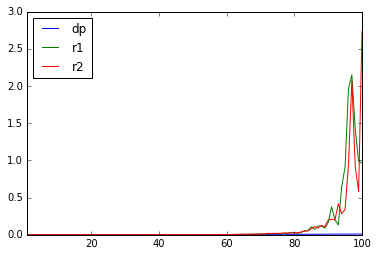

In [99]:
time_df[:100].plot()